In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint

# Fashion MNIST 데이터셋 로드
(train_images, train_labels), (test_images,
                               test_labels) = fashion_mnist.load_data()

# 데이터 정규화
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# 레이블 원-핫 인코딩
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# 데이터 분할: train, val, test (80%, 10%, 10%)
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42)
val_images, test_images, val_labels, test_labels = train_test_split(
    val_images, val_labels, test_size=0.5, random_state=42)

In [2]:
# 모델 구성
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.25),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                             

2023-12-05 15:56:48.890517: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-05 15:56:48.890608: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
history = model.fit(train_images,
                    train_labels,
                    epochs=20,
                    validation_data=(val_images, val_labels),
                    callbacks=[ModelCheckpoint('best_model.h5', save_best_only=True)])

Epoch 1/20


2023-12-05 15:56:49.122583: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-12-05 15:56:49.315684: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1498/1500 [============================>.] - ETA: 0s - loss: 0.5154 - accuracy: 0.8126

2023-12-05 15:57:06.437517: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 19s 12ms/step - loss: 0.5153 - accuracy: 0.8126 - val_loss: 0.3791 - val_accuracy: 0.8595
Epoch 2/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3451 - accuracy: 0.8759 - val_loss: 0.3228 - val_accuracy: 0.8798
Epoch 3/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2976 - accuracy: 0.8911 - val_loss: 0.2783 - val_accuracy: 0.8992
Epoch 4/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2685 - accuracy: 0.9019 - val_loss: 0.2656 - val_accuracy: 0.9020
Epoch 5/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2467 - accuracy: 0.9086 - val_loss: 0.2823 - val_accuracy: 0.8988
Epoch 6/20
1500/1500 [==============================] - 19s 13ms/step - loss: 0.2313 - accuracy: 0.9149 - val_loss: 0.2634 - val_accuracy: 0.8993
Epoch 7/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2141 - accuracy: 0.9210 - val_loss: 0.2476 - val_accura

In [6]:
# 체크포인트에서 모델 로드
model.load_weights('best_model.h5')

# 모델 평가
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
test_loss, test_accuracy

188/188 [==============================] - 2s 8ms/step - loss: 0.2522 - accuracy: 0.9122


(0.2522028684616089, 0.9121666550636292)

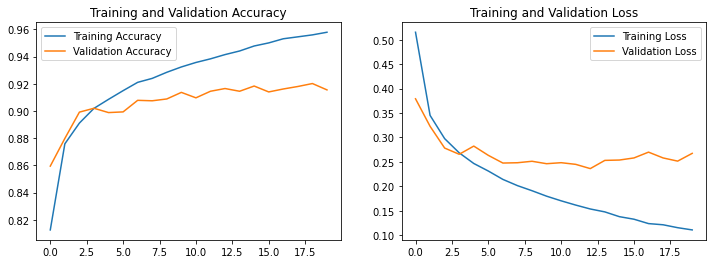

In [5]:
import matplotlib.pyplot as plt

# 훈련 및 검증 정확도와 손실 그래프 그리기
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()